In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
# the database 'ALL-INDIA-NETWORK-5000 data hms.xls' and 'ALL-INDIA-NETWORK-HOSPITALS-GENERAL (2).xls' are the same,
# hence analyzing just one
df = pd.read_excel('ALL-INDIA-NETWORK-5000 data hms.xls', sheetname='Sheet1')

In [15]:
df.head()

,SL NO,NAME OF THE HOSPITAL,ADDRESS-1,ADDRESS-2,CITY,DISTRICT,STATE,PINCODE,STD CODE,PHONE NO.
0,1,KAILASH HOSPITAL LTD,"23, KNOWLEDGE GREEN PARK-1",INSTITUTIONAL AREA,GREATER NOIDA,GREATER NOIDA,UTTAR PRADESH,201305,0120,2321111
1,2,A.B.EYE INSTITUTE,NEAR BAHADURPUR RAILWAY CROSSING,RAJENDRANAGAR,PATNA,PATNA,BIHAR,800016,0612,2670292
2,3,A.C.HOSPITAL,"104,II AGRAHARAM",SALEM,SALEM,SALEM,TAMIL NADU,636001,0427,2260577 / 2267957
3,4,A.G.HOSPITAL,"34, KPN COLONY",3RD STREET,TIRUPUR,TIRUPUR,TAMIL NADU,641601,0421,"2202444, 2202666"
4,5,A.G.M.HOSPITAL,"923, POONAMALLEE HIGH ROAD",POONAMALLEE HIGH ROAD,CHENNAI,CHENNAI,TAMIL NADU,600010,044,26411011 & 26411233


This database contains hospital data from all over India, it mainly contains the hospital contact details and there addresses.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5083 entries, 0 to 5082
Data columns (total 10 columns):
SL NO                   5083 non-null int64
NAME OF THE HOSPITAL    5083 non-null object
ADDRESS-1               5083 non-null object
ADDRESS-2               5041 non-null object
CITY                    5083 non-null object
DISTRICT                5083 non-null object
STATE                   5083 non-null object
PINCODE                 5083 non-null int64
STD CODE                4774 non-null object
PHONE NO.               5081 non-null object
dtypes: int64(2), object(8)
memory usage: 397.2+ KB


We can see that the STD CODE feature has some null values, these null values can be imputed if we have a dictionary mapping of CITY against there std codes which can be obtained externally, for now we'll leave it as is.

In [17]:
df.describe()

,SL NO,PINCODE
count,5083.00000,5083.000000
mean,2542.00000,471525.409207
std,1467.48004,170409.712500
min,1.00000,110002.000000
25%,1271.50000,400058.000000
50%,2542.00000,515001.000000
75%,3812.50000,600034.000000
max,5083.00000,844101.000000


Let's see the state wise distribution of the hospitals

In [18]:
df['STATE '].describe()

count           5083
unique            30
top       TAMIL NADU
freq             985
Name: STATE , dtype: object

In [19]:
df.groupby(['STATE '])['SL NO'].count()

STATE 
ANDHRA PRADESH            481
ASSAM                      22
BIHAR                      18
CHANDIGARH                 18
CHHATTISGARH               12
DADRA AND NAGAR HAVELI      1
DELHI                     220
GOA                         7
GUJARAT                   191
HARYANA                   133
HIMACHAL PRADESH            6
JAMMU & KASHMIR            11
JHARKHAND                  11
KARNATAKA                 647
KERALA                    198
MADHYA PRADESH             75
MAHARASHTRA               770
MANIPUR                     1
MIZORAM                     1
NAGALAND                    2
ORISSA                     39
PONDICHERRY                12
PUNJAB                    180
RAJASTHAN                 160
SIKKIM                      1
TAMIL NADU                985
TELANGANA                 482
UTTAR PRADESH             248
UTTARAKHAND                17
WEST BENGAL               134
Name: SL NO, dtype: int64

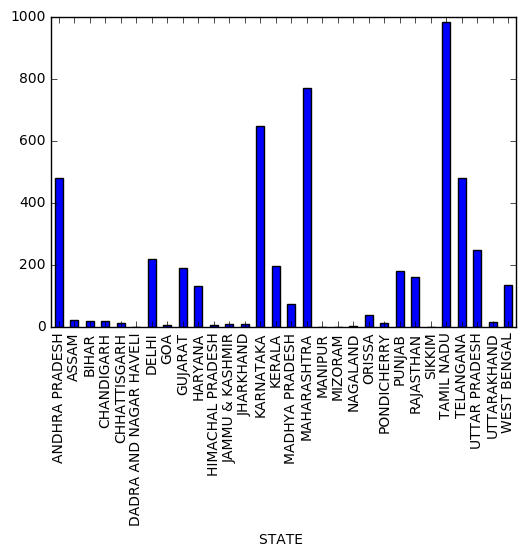

In [21]:
 df.groupby(['STATE '])['SL NO'].count().plot(kind='bar')

We can see that **Tamil Nadu** has the highest number of hospitals with 985 hospitals, whereas states **Manipur, Mizoram and Sikkim** have only one hospital each. Another important observation is that the state of **Uttar Pradesh** has just 248 hospitals considering it is the most populous state in India.